# 1. Importar Bibliotecas

In [45]:
# Importação das bibliotecas principais para análise de dados e visualização
import pandas as pd
import matplotlib.pyplot as plt

# 2. Carregar dados (FootyStats ou CSVs salvos)

In [46]:
# Leitura dos dados brutos diretamente do repositório no GitHub
url = 'https://raw.githubusercontent.com/danoliveiraed/portfolio-projects/refs/heads/main/campeonato-brasileiro-analise/data/raw/Brasileirao_Matches.csv'

# Carrega o dataset em um DataFrame pandas
dado = pd.read_csv(url, sep=',')
dado.head(3)

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1


In [47]:
# Visualização das últimas linhas do conjunto de dados para verificar consistência
dado.tail(3)

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
4177,2022-11-13 16:00:00,Goias-GO,GO,Sao Paulo-SP,SP,NaN,NaN,2022,38
4178,2022-11-13 16:00:00,Cuiaba-MT,MT,Coritiba-PR,PR,NaN,NaN,2022,38
4179,2022-11-13 16:00:00,Atletico-PR,PR,Botafogo-RJ,RJ,NaN,NaN,2022,38


## 3. Limpeza e tratamento

In [48]:
# Verificação da presença de valores nulos por coluna
print(dado.isnull().sum())

datetime            0
home_team           0
home_team_state     0
away_team           0
away_team_state     0
home_goal          82
away_goal          82
season              0
round               0
dtype: int64


In [49]:
# Remoção de linhas com dados ausentes (jogos sem placar final)
dado = dado.dropna()
print(dado.isnull().sum())

datetime           0
home_team          0
home_team_state    0
away_team          0
away_team_state    0
home_goal          0
away_goal          0
season             0
round              0
dtype: int64


In [50]:
# Renomeia as colunas para nomes em português e mais amigáveis
dado.columns = [
    'data',
    'mandante',
    'estado_mandante',
    'visitante',
    'estado_visitante',
    'gols_mandante',
    'gols_visitante',
    'temporada',
    'rodada'
]
dado.head(1)

,data,mandante,estado_mandante,visitante,estado_visitante,gols_mandante,gols_visitante,temporada,rodada
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1


In [51]:
# Conversão da coluna de data para o formato datetime do pandas
dado['data'] = pd.to_datetime(dado['data'])
dado.head(1)

,data,mandante,estado_mandante,visitante,estado_visitante,gols_mandante,gols_visitante,temporada,rodada
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1


In [52]:
# Conversão dos campos numéricos para tipo inteiro
dado['gols_mandante'] = dado['gols_mandante'].astype(int)
dado['gols_visitante'] = dado['gols_visitante'].astype(int)
dado['temporada'] = dado['temporada'].astype(int)
dado['rodada'] = dado['rodada'].astype(int)
dado.head(1)

,data,mandante,estado_mandante,visitante,estado_visitante,gols_mandante,gols_visitante,temporada,rodada
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1,1,2012,1


In [53]:
# Remoção de espaços em branco nos nomes dos times
dado['mandante'] = dado['mandante'].str.strip()
dado['visitante'] = dado['visitante'].str.strip()
dado.head(1)

,data,mandante,estado_mandante,visitante,estado_visitante,gols_mandante,gols_visitante,temporada,rodada
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1,1,2012,1


In [54]:
# Verificação da existência de registros duplicados
print(dado.duplicated().sum())

0


# 4. Criação de análises

In [55]:
# Função que determina o resultado do mandante (Vitória, Empate ou Derrota)
def resultado_mandante(row):
    if row['gols_mandante'] > row['gols_visitante']:
        return 'V'
    elif row['gols_mandante'] == row['gols_visitante']:
        return 'E'
    else:
        return 'D'

# Aplica a função ao DataFrame para criar nova coluna com o resultado do mandante
dado['resultado_mandante'] = dado.apply(resultado_mandante, axis=1)
dado.head(1)

,data,mandante,estado_mandante,visitante,estado_visitante,gols_mandante,gols_visitante,temporada,rodada,resultado_mandante
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1,1,2012,1,E


In [56]:
# Contagem dos resultados possíveis
vitorias_mandante = (dado['resultado_mandante'] == 'V').sum()
empates = (dado['resultado_mandante'] == 'E').sum()
vitorias_visitante = (dado['resultado_mandante'] == 'D').sum()  # quando mandante perde, visitante ganha

In [57]:
# Cálculo dos percentuais de cada tipo de resultado
total_jogos = len(dado)

percent_vit_mandante = vitorias_mandante / total_jogos * 100
percent_empates = empates / total_jogos * 100
percent_vit_visitante = vitorias_visitante / total_jogos * 100

# Impressão dos resultados no console
print(f'Vitórias do mandante: {percent_vit_mandante:.2f}%')
print(f'Empates: {percent_empates:.2f}%')
print(f'Vitórias do visitante: {percent_vit_visitante:.2f}%')

Vitórias do mandante: 48.71%
Empates: 27.14%
Vitórias do visitante: 24.16%


# 5. Visualizações com Seaborn e Matplotlib

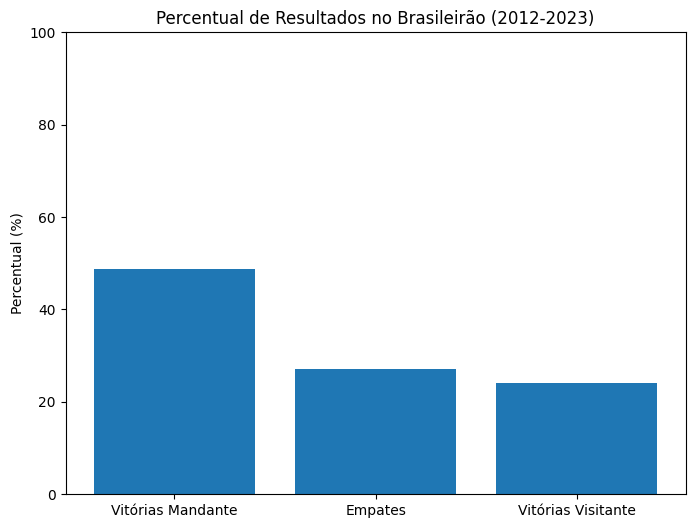

In [58]:
# Criação de gráfico de barras com os percentuais de resultado por tipo
import matplotlib.pyplot as plt

labels = ['Vitórias Mandante', 'Empates', 'Vitórias Visitante']
percentuais = [percent_vit_mandante, percent_empates, percent_vit_visitante]

plt.figure(figsize=(8,6))
plt.bar(labels, percentuais)
plt.ylabel('Percentual (%)')
plt.title('Percentual de Resultados no Brasileirão (2012-2023)')
plt.ylim(0, 100)
plt.show()

# 6. Exportar CSVs tratados

In [59]:
# Exportação do DataFrame tratado para arquivo CSV
dado.to_csv('brasileirao_limpo.csv', index=False)